In [7]:
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import pickle

In [8]:
train_dir = 'dataset/train'
valid_dir = 'dataset/test'

In [9]:
batch_size = 8
target_size = (256, 256)  # Adjust the target size according to your requirements
color_mode = 'grayscale'
class_mode = 'binary'

train_data_generator = ImageDataGenerator(rescale=1.0 / 255)
valid_data_generator = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_data_generator.flow_from_directory(
    train_dir,
    target_size=target_size,
    color_mode=color_mode,
    batch_size=batch_size,
    class_mode=class_mode
)

valid_generator = valid_data_generator.flow_from_directory(
    valid_dir,
    target_size=target_size,
    color_mode=color_mode,
    batch_size=batch_size,
    class_mode=class_mode
)

Found 3201 images belonging to 2 classes.
Found 799 images belonging to 2 classes.


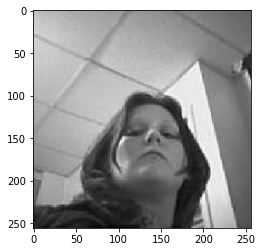

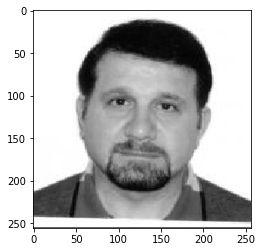

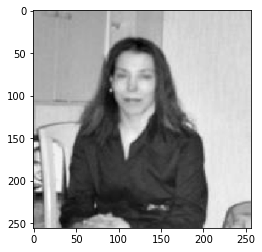

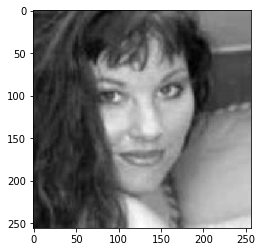

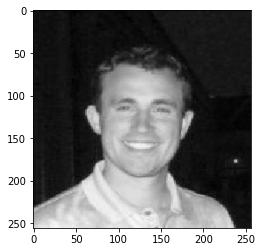

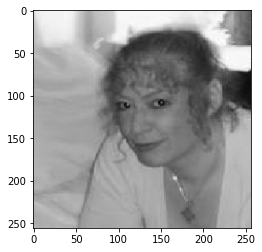

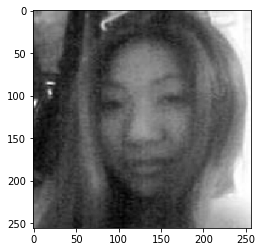

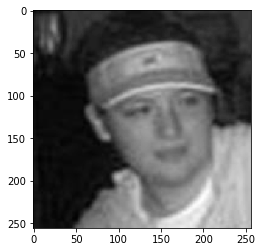

In [10]:
# Generate a random batch of images and labels
images, labels = next(train_generator)

# Display the images from the batch
num_images = images.shape[0]

for i in range(num_images):
   plt.imshow(images[i], cmap='gray')
   plt.show()

In [11]:
# each batch
print(images.shape)
# every image in each batch
print(train_generator.image_shape)

(8, 256, 256, 1)
(256, 256, 1)


In [12]:
# Define the CNN model
model = models.Sequential()

# Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the feature maps
model.add(layers.Flatten())

# Dense layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 128)     

In [13]:
model.fit(train_generator, steps_per_epoch = 401, epochs = 6,
            validation_data = valid_generator, validation_steps = 401, verbose = 1)

Epoch 1/6
401/401 [==============================] - 226s 561ms/step - loss: 0.6995 - accuracy: 0.5380 - val_loss: 0.6793 - val_accuracy: 0.5569
Epoch 2/6
401/401 [==============================] - 219s 547ms/step - loss: 0.6781 - accuracy: 0.5720
Epoch 3/6
401/401 [==============================] - 219s 546ms/step - loss: 0.6700 - accuracy: 0.5964
Epoch 4/6
401/401 [==============================] - 212s 529ms/step - loss: 0.6573 - accuracy: 0.6154
Epoch 5/6
401/401 [==============================] - 217s 540ms/step - loss: 0.5973 - accuracy: 0.6813
Epoch 6/6
401/401 [==============================] - 232s 580ms/step - loss: 0.4542 - accuracy: 0.7779


In [14]:
loss, accuracy = model.evaluate(valid_generator)

print("Test loss:", loss)
print("Test accuracy:", accuracy)

100/100 [==============================] - 13s 127ms/step - loss: 0.8458 - accuracy: 0.6070
Test loss: 0.8458103537559509
Test accuracy: 0.6070087552070618


In [15]:
model.fit(train_generator, steps_per_epoch = 401, epochs = 2,
            validation_data = valid_generator, validation_steps = 401, verbose = 1)

Epoch 1/2
401/401 [==============================] - 257s 640ms/step - loss: 0.2245 - accuracy: 0.9044 - val_loss: 1.1443 - val_accuracy: 0.5920
Epoch 2/2
401/401 [==============================] - 244s 608ms/step - loss: 0.0750 - accuracy: 0.9738


In [16]:
loss, accuracy = model.evaluate(valid_generator)

print("Test loss:", loss)
print("Test accuracy:", accuracy)

100/100 [==============================] - 14s 137ms/step - loss: 1.8660 - accuracy: 0.5907
Test loss: 1.8659706115722656
Test accuracy: 0.5907384157180786


In [ ]:
# Save the trained model
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)